In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Titanic_data.csv',sep=',',na_values='?')
data.shape

(418, 11)

In [3]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
test_data=pd.read_csv('test.csv')
test_data=test_data.set_index('PassengerId')
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(test_data.shape)

(418, 10)


In [9]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
test_data['Age']=test_data['Age'].replace(to_replace=np.nan,value=test_data['Age'].median())

In [11]:
test_data['Age'].count()

418

In [12]:
test_data['Age'].isnull().sum()

0

In [13]:
train_data=pd.read_csv('train.csv')
train_data=train_data.set_index('PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Visually inspect the head of the dataset, Examine the train dataset to understand in particular if the data is tidy, shape of the dataset, examine datatypes, examine missing values, unique counts and build a data dictionary dataframe
Conditions to check if data is tidy:

Is every column a variable?
Is every row an observation?
Is every table a single observational unit?

In [14]:
train_data.shape

(891, 11)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
train_data['Embarked'].count()

889

In [19]:
train_data['Embarked'].value_counts()  #more people have Embarked the Titanic from Port - S indicating that Port - S may have been for the masses i.e lower economic class passengers.
                                       #We thus impute the 2 missing values in Embarked column with 'S'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
train_data['Cabin'].count()

204

In [22]:
#train_data['Cabin'].value_counts()

In [23]:
datadict=pd.DataFrame(train_data.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [24]:
datadict['Missingval']=train_data.isnull().sum()
datadict['NUnique']=train_data.nunique()
datadict['Count']=train_data.count()
datadict=datadict.rename(columns={0:'DataType'})  #rename the 0th column
datadict

,DataType,Missingval,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


Descriptive statistics of object and numerical datatypes, and finally transform datatypes accoringly

In [25]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stranden, Mr. Juho",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [26]:
train_data.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train_data['Embarked']=train_data['Embarked'].replace(to_replace=np.nan,value='S')
train_data['Embarked'].count()

891

In [28]:
train_data['Cabin']=np.where(train_data['Cabin'].isnull(), 'NoCabin', train_data['Cabin'])
#train_data['Cabin']=np.where(train_data['Cabin']==np.nan, 'NoCabin', train_data['Cabin'])

In [29]:
train_data['Cabin'].count()

891

In [30]:
train_data['Cabin'].unique()

array(['NoCabin', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

Age has a lot of missing values 

In [31]:
train_data['Age']=train_data['Age'].replace(to_replace=np.nan,value=train_data['Age'].median())

In [32]:
train_data['Age'].count()

891

In [33]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [34]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NoCabin,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NoCabin,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NoCabin,S


# Carryout univariate and multivariate analysis using graphical and non graphical (some numbers representing the data)

In [35]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
train_data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<font color = blue>This means that only 38% passengers actually survived while 61% of the passengers died. </font>

In [37]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Univariate Analysis

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


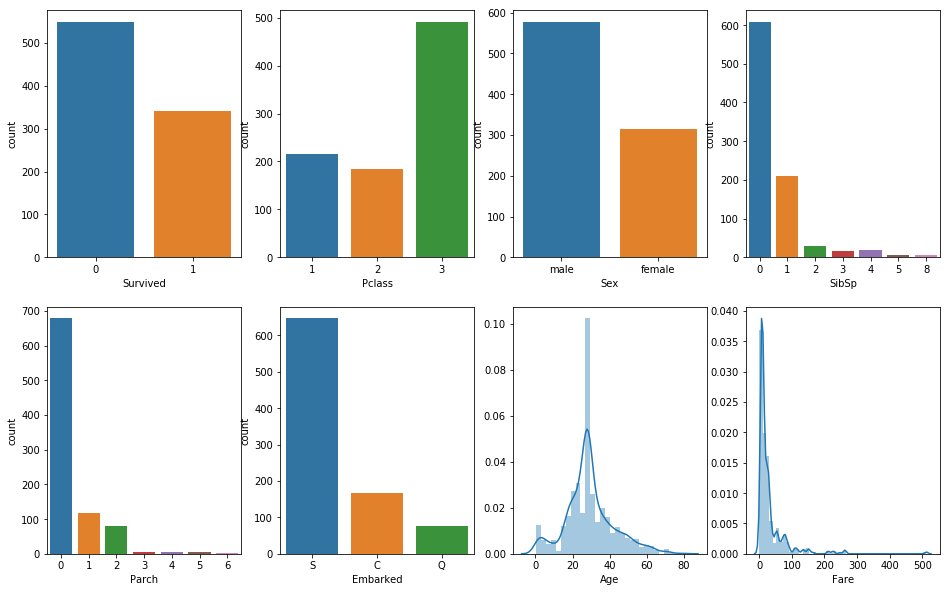

In [38]:
fig,axes=plt.subplots(2,4,figsize=(16,10))   # plot 8 graphs in 2 rows with 4 columns
sns.countplot('Survived',data=train_data,ax=axes[0,0])
sns.countplot('Pclass',data=train_data,ax=axes[0,1])
sns.countplot('Sex',data=train_data,ax=axes[0,2])
sns.countplot('SibSp',data=train_data,ax=axes[0,3])
sns.countplot('Parch',data=train_data,ax=axes[1,0])
sns.countplot('Embarked',data=train_data,ax=axes[1,1])
sns.distplot(train_data['Age'],kde=True,ax=axes[1,2])
sns.distplot(train_data['Fare'],kde=True,ax=axes[1,3])

#### Bivariate EDA
We need to check what other factor or feature played a role in Survival (our dependant variable)

In [39]:
print('Survival based on Pclass',train_data.groupby('Pclass')['Survived'].count())
print('Survival based on Pclass',train_data.groupby('Pclass')['Survived'].mean())

Survival based on Pclass Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Survival based on Pclass Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [40]:
print('Survival based on Gender',train_data.groupby('Sex')['Survived'].count())
print('Survival based on Gender',train_data.groupby('Sex')['Survived'].mean())
pd.crosstab(train_data['Survived'],train_data['Sex'],normalize='columns')

Survival based on Gender Sex
female    314
male      577
Name: Survived, dtype: int64
Survival based on Gender Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


# Around 75% of the females survived and only 18.8% of the males survived which suggests that gender has a strong relationship with the survival rates.

In [41]:
print('Survival based on Siblings',train_data.groupby('SibSp')['Survived'].count())

Survival based on Siblings SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64


In [42]:
pd.crosstab(train_data['Survived'],train_data['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [43]:
pd.crosstab(train_data['Survived'],train_data['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [44]:
print('Survival based on Parent-children',train_data.groupby('Parch')['Survived'].count())

Survival based on Parent-children Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64


In [45]:
print('Survival based on Port embarked from',train_data.groupby('Embarked')['Survived'].count())
print('Survival based on Port embarked from',train_data.groupby('Embarked')['Survived'].mean())

Survival based on Port embarked from Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64
Survival based on Port embarked from Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [46]:
print('Survival based on embarkment,pclass,gender: \n',train_data.groupby(['Embarked','Pclass','Sex'])['Survived'].mean())

Survival based on embarkment,pclass,gender: 
 Embarked  Pclass  Sex   
C         1       female    0.976744
                  male      0.404762
          2       female    1.000000
                  male      0.200000
          3       female    0.652174
                  male      0.232558
Q         1       female    1.000000
                  male      0.000000
          2       female    1.000000
                  male      0.000000
          3       female    0.727273
                  male      0.076923
S         1       female    0.960000
                  male      0.354430
          2       female    0.910448
                  male      0.154639
          3       female    0.375000
                  male      0.128302
Name: Survived, dtype: float64


In [47]:
pd.crosstab(train_data['Embarked'],train_data['Sex'])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,205,441


In [48]:
pd.crosstab(train_data['Embarked'],train_data['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [49]:
pd.crosstab(train_data['Embarked'],train_data['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


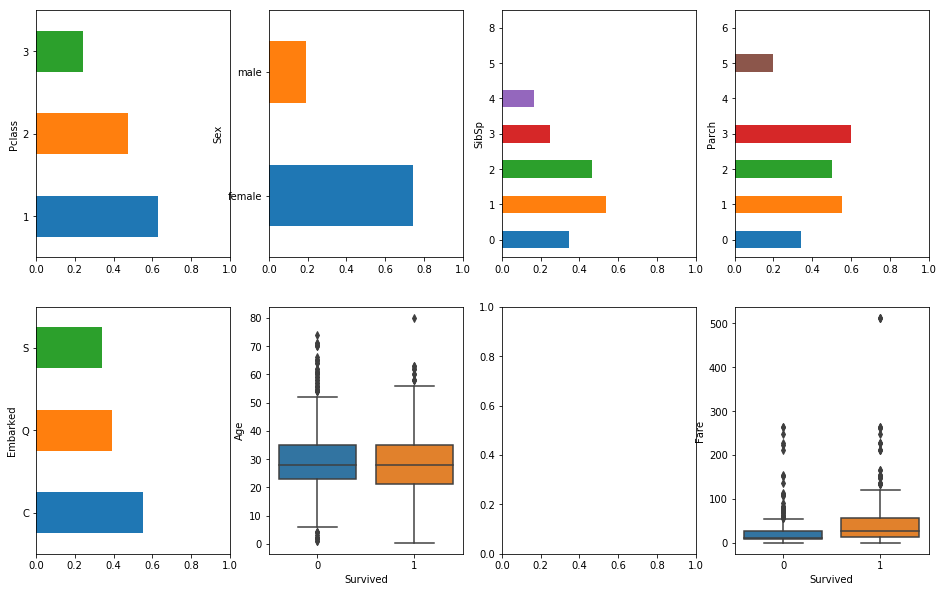

In [50]:
figbi,axesbi=plt.subplots(2,4,figsize=(16,10))
train_data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train_data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train_data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train_data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train_data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x='Survived',y='Age',data=train_data,ax=axesbi[1,1])
sns.boxplot(x='Survived',y='Fare',data=train_data,ax=axesbi[1,3])

We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

There is also a marginal relationship between the fare and survial rate.

# Joint Plots (continous vs continous)

In [51]:
from IPython.display import Image,display

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


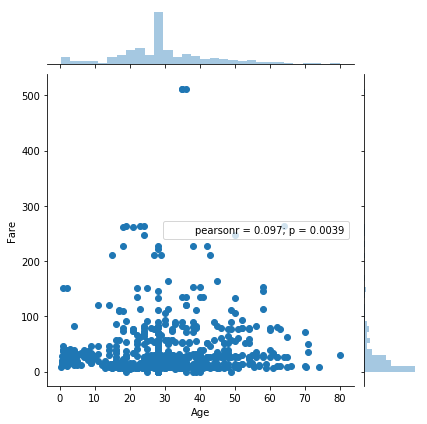

In [52]:
sns.jointplot('Age','Fare',data=train_data)

# Mutivariate EDA

In [53]:
corr=train_data.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Survived

There is a negative coorelation between Fare and Pclass, Age and Plcass

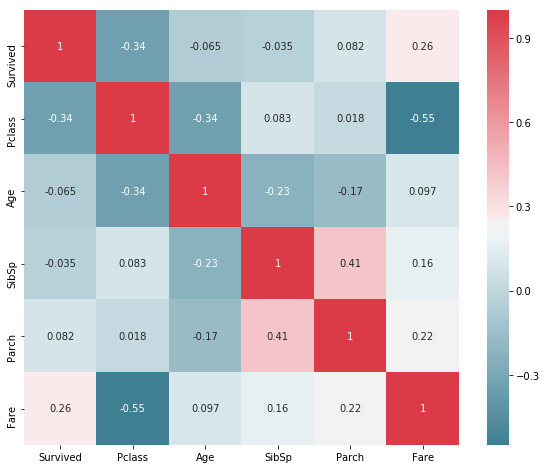

In [54]:
f,ax=plt.subplots(figsize=(10,8))

sns.heatmap(data=corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,annot=True)

# Feature Engineering Data - Extract title from name, Extract new features from the other features

New Features

In [55]:
train_data['Name_len']=train_data['Name'].str.len()

In [56]:
train_data['Ticket_first']=train_data['Ticket'].str[0]

In [57]:
train_data['FamilyCount']=train_data['SibSp']+train_data['Parch']

In [58]:
train_data['Cabin_First']=train_data['Cabin'].str[0]

In [59]:
#Regular expression to get the title of the name
train_data['Title']=train_data['Name'].str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [60]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_first,FamilyCount,Cabin_First,Title
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S,23,A,1,N,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,P,1,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S,22,S,0,N,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,1,1,C,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S,24,3,0,N,Mr.


In [61]:
train_data['Title'].value_counts().reset_index()

,index,Title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Mlle.,2
7,Major.,2
8,Col.,2
9,Lady.,1


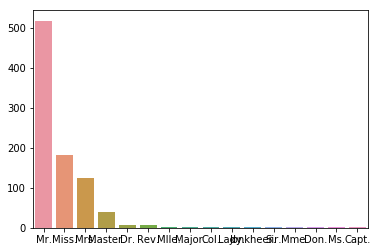

In [62]:
y=train_data['Title'].value_counts()
sns.barplot(y.index,y.values)

#### Preprocessing and preparing data for Statistical Modeling

#### a. Imput Missing or Zero values to the <font color = blue> Fare variable </font>

In [63]:
(train_data.Fare==0).sum()

15

In [64]:
# We see that there are 15 zero values and its reasonable
# to flag them as missing values since every ticket should have
# a value greater than 0 so mark 0 values as missing values

In [65]:
train_data['Fare']=train_data['Fare'].replace(0,train_data['Fare'].mean())

In [66]:
(train_data['Fare']==0).sum() #check if there are any 0 values

0

# Statistical Modeling

In [67]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Name_len', 'Ticket_first', 'FamilyCount',
       'Cabin_First', 'Title'],
      dtype='object')

In [68]:
trainML = train_data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
                                       'Fare', 'Embarked', 'Name_len', 'Ticket_first', 'FamilyCount', 'Title']]

In [69]:
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_first    0
FamilyCount     0
Title           1
dtype: int64

In [70]:
trainML.shape

(891, 14)

In [71]:
trainML=trainML.dropna()

In [72]:
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_first    0
FamilyCount     0
Title           0
dtype: int64

In [73]:
trainML.shape

(890, 14)

In [74]:
trainML.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_len,Ticket_first,FamilyCount,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,A,1,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,51,P,1,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,22,S,0,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,44,1,1,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24,3,0,Mr.


Splitting the dataset into training and testing data

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X=trainML.iloc[:,0].values
X

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [77]:
Y=trainML.iloc[:,1:14]
Y.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_len,Ticket_first,FamilyCount,Title
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,A,1,Mr.
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,51,P,1,Mrs.
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,22,S,0,Miss.
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,44,1,1,Mrs.
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24,3,0,Mr.


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

# A single predictor model with logistic regression
we use logistic regression as the response variable is a binary classification

<Font color=blue>_Regression on survival based on age_</Font>

In [79]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [80]:
X_age=trainML[['Age']].values
Y=trainML['Survived'].values

# Use the fit method to train
lr.fit(X_age,Y)

# Make a prediction
y_predict=lr.predict(X_age)
y_predict[:10]
(Y==y_predict).mean()

0.6168539325842697

In [81]:
X_age=trainML[['Age']].values
Y=trainML['Survived'].values

# Use the fit method to train
lr.fit(X_age,Y)

# Make a prediction
y_predict=lr.predict(test_data[['Age']].values)
y_predict[:10]
(Y==y_predict)
sorted(y_predict)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<font color = red>The prediction accuracy is marginally better than the base line accuracy of 61.5% which we got earlier </font>

<font color = blue>__Regression on survival based on Fare__ </font>

In [82]:
X_age=trainML[['Fare']].values
Y=trainML['Survived'].values

# Use the fit method to train
lr.fit(X_age,Y)

# Make a prediction
y_predict=lr.predict(X_age)
y_predict[:10]
(Y==y_predict).mean()

0.6651685393258427

<font color = red>The prediction accuracy got a bit better than the Age variable and much better than 61.5% base accuracy </font>

<font color = blue>__Regression on survive based on Sex (using a Categorical Variable)__ </font>

In [83]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values

# Use the fit method to train
lr.fit(X_sex, y)

# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.7865168539325843

<font color = red> The gender of passenger is a strong predictor and purely predciting based on gender, the model accuracy increased to 78% </font>

<font color = blue>__Regression on survive based on PClass (using a Categorical Variable)__ </font>

In [84]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)

# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6786516853932584

<font color = red> Gender of the passenger seems a strong predictor compared to the PClass of the passenger on Survival </font>

<font color = blue>__Regression on survival based on Random Forest Model__ </font>

In [85]:
from sklearn.ensemble import RandomForestClassifier
X= trainML[['Age', 'SibSp', 'Parch', 'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)

# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9651685393258427

<font color = red> __Random forest__ did a good job in predicting the survival with a __97% accuracy__ </font>

In [86]:
from sklearn.ensemble import RandomForestClassifier
X= trainML[['Age', 'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)

# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9685393258426966

In [87]:
from sklearn.ensemble import RandomForestClassifier
X= trainML[['Age', 'Fare', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)

# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9348314606741573